# Table of Contents
- [Pathway Analysis of DE genes using webtools](#Pathway-Analysis-of-DE-genes-using-webtools)
    - [g:Profiler](#g:Profiler) (g:GOSt)
    - [Gene Ontology (GO)](#Gene-Ontology-(GO))
- [Pathway Analysis of DE genes using R](#Pathway-Analysis-of-DE-genes-using-R)
    - [GAGE](#GAGE) and GOView
    - [GSEA](#GSEA) with gseGO
    - [KEGG](#KEGG) with enrichKEGG

# Pathway Analysis of DE genes using webtools

| Feature                         | g\:Profiler (g\:GOSt)                         | Gene Ontology (GO.org)                      |
| ------------------------------- | --------------------------------------------- | ------------------------------------------- |
| **Primary Purpose**             | Enrichment analysis of gene lists             | Database of gene function ontology          |
| **Accepts Gene Lists**          | ✅ Yes                                         | ❌ No (exploration only)                     |
| **Performs Enrichment Testing** | ✅ Yes (with multiple databases)               | ❌ No                                        |
| **Ontology Browser**            | ❌ No                                          | ✅ Yes (via AmiGO)                           |
| **Data Source**                 | Aggregates GO + others (KEGG, Reactome, etc.) | Only GO (curated)                           |
| **Organism Support**            | Multiple species                              | Multiple species annotations                |
| **Output**                      | Tables, plots, GO term enrichment             | GO term structure, definitions, annotations |

## [g:Profiler](https://biit.cs.ut.ee/gprofiler/gost)
### *Functional Enrichment Analysis Tool*
(We already covered this in Module03_HTSeq-count_edgeR_DESeq2.ipynb, but let's review it)
### Main Purpose:
To perform functional enrichment analysis on a list of genes/proteins to identify over-represented biological terms (GO terms, pathways, regulatory motifs, etc.).

### Key Features:
- Accepts gene/protein identifiers from multiple organisms.
- Tests input genes for enrichment in:
    - Gene Ontology (GO) categories (BP, MF, CC)
    - KEGG, Reactome, WikiPathways
    - TRANSFAC, miRTarBase (TF/miRNA binding sites)
    - Human Phenotype Ontology
    - Ensembl Regulatory Build
- Offers ID mapping and ortholog conversions.
- Returns adjusted p-values using multiple testing corrections (e.g. g:SCS, Bonferroni, FDR).

### Use Case:
When you have a gene list (e.g. from DESeq2 or edgeR) and want to find enriched biological functions/pathways.

### How to use g:Profiler
- Download the file: outdir/DE_sig_genes_DESeq2.tsv. Open this on Excel as "Delimited", check the box "My data has header", select and "Tab", set "ensemblID" and "Symbol" columns as "Text", the rest as "General", sort on “log2FoldChange” column (smallest to largest) and find the top 100 significant genes with higher expression in HBR (brain). These log2FoldChange are large negative numbers. Meanwhile, sort log2FC from largest to smallest then take the top 100 genes, these genes are highly expressed in UHR. These log2FoldChange are large positive numbers.
- Try querying with the top 100 HBR over-expressed genes (either ensemblID or Symbol works) using: [g:Profiler](https://biit.cs.ut.ee/gprofiler/gost)


Remember that UHR ([Universal Human Reference](https://rnabio.org/assets/module_1/UHR.pdf)) is total RNA isolated from a diverse set of 10 cancer cell lines (breast, liver, cervix, testis, brain, skin, fatty tissue, histocyte, macrophage, T cell, B cell). The HBR ([Human Brain Reference](https://rnabio.org/assets/module_1/HBR.pdf)) is total RNA isolated from the brains of 23 Caucasians, male and female, of varying age but mostly 60-80 years old.

When DESeq2 outputs something like: "log2 fold change: Condition UHR vs HBR"

…it means the log2 fold change (log2FC) was calculated as:

\begin{equation*}
\log_2\text{FoldChange} = \log_2 \left( \frac{\text{expression in UHR}}{\text{expression in HBR}} \right) = \log_2(\text{UHR}) - \log_2(\text{HBR})
\end{equation*}

🔍 Interpretation:
- A positive log2FC → gene is upregulated in UHR relative to HBR.
- A negative log2FC → gene is downregulated in UHR (i.e., upregulated in HBR).

#### Highly expressed genes in UHR (large positive log2FC)
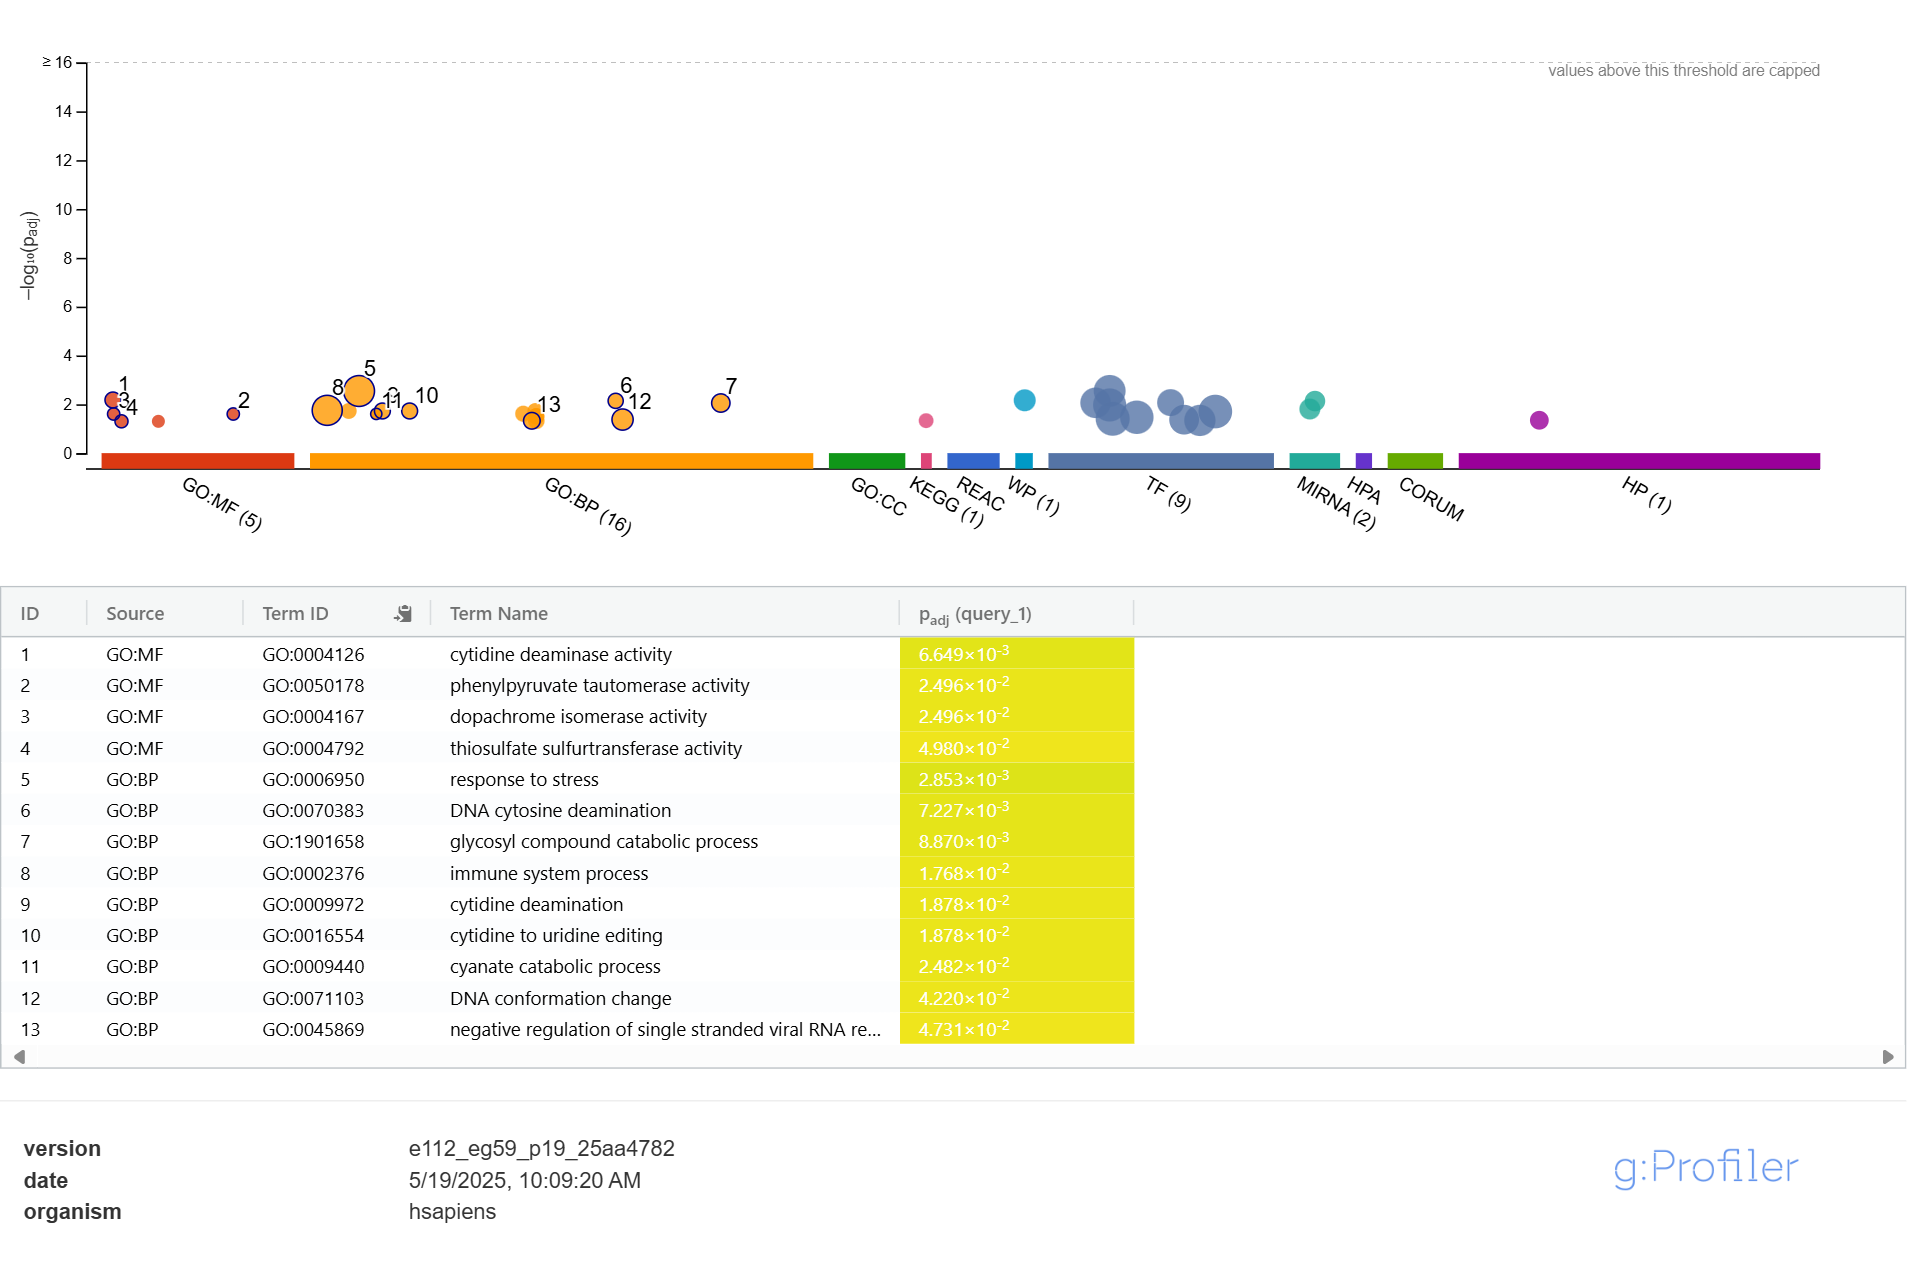

#### Highly expressed genes in HBR (large negative log2FC). We can see these are pathways related to synap and cerebellum which makes sense.
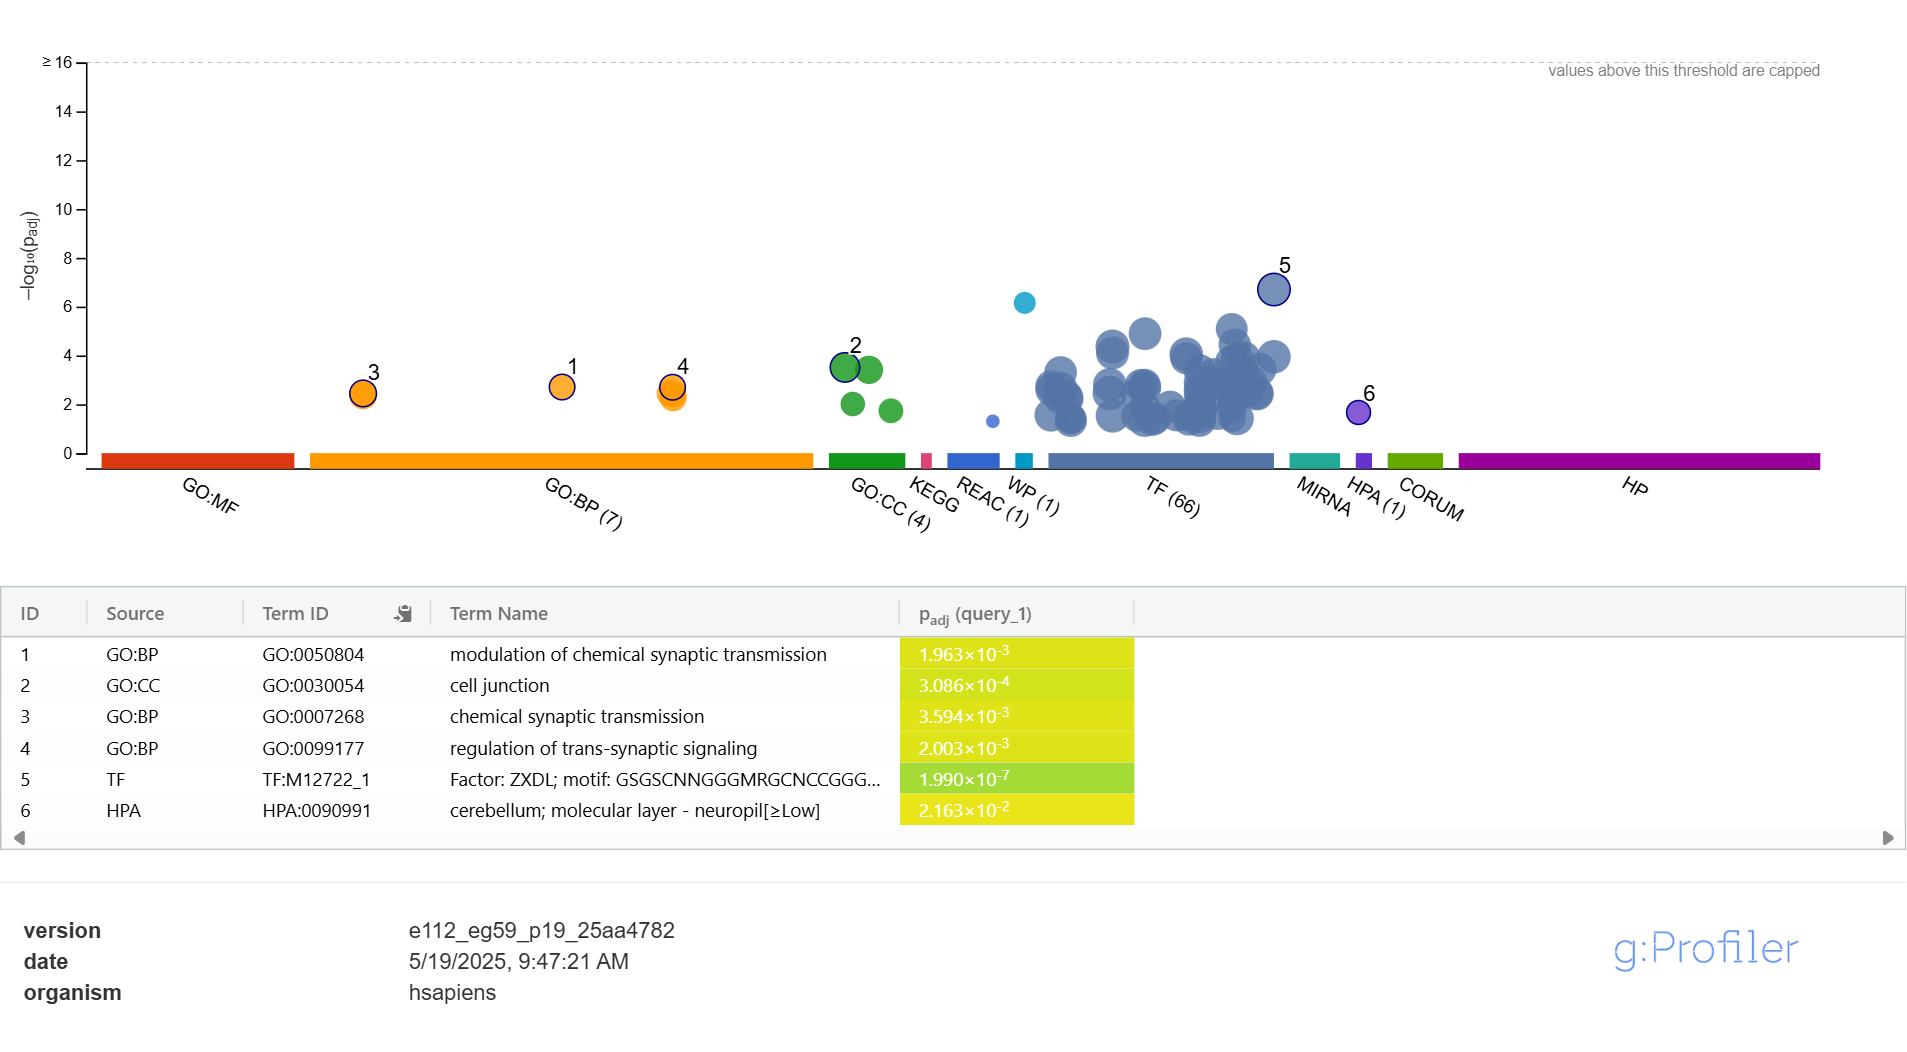

## [Gene Ontology (GO)](https://www.geneontology.org/) 
### *Ontology Database and Structure*
### Main Purpose:
To maintain and develop the structured vocabulary (ontology) for describing gene product function, not perform enrichment itself.

### Key Features:
- Provides a hierarchical structure of:
    - Biological Processes (BP)
    - Molecular Functions (MF)
    - Cellular Components (CC)
- Links GO terms to genes/proteins via annotations.
- Offers tools like:
    - AmiGO (search and browse GO terms/annotations)
    - OWL/RDF exports for computational ontology analysis.
- Powered by the GO Consortium (GOC), which curates and maintains ontology terms and annotations.

#### Use Case:
When you want to explore, define, or download detailed ontology relationships or see what GO terms are linked to a specific gene.

Open DE_sig_genes_DESeq2.tsv on Excel as "Delimited", check the box "My data has header", select and "Tab", set "ensemblID" and "Symbol" columns as "Text", the rest as "General", sort on “log2FoldChange” column (smallest to largest) and find the top 100 significant genes with **higher expression in HBR (brain)**. These log2FoldChange are large negative numbers. Paste these gene symbols (some shown below) to [GO](https://www.geneontology.org/). Choose "biological process", "molecular function", or "cellular component" respectively.

RP5-1119A7.17
CACNG2
CLDN5
RASL10A
MPPED1
CACNA1I
SULT4A1
RFPL1S
DGCR5
CHADL
LINC00634
KCNJ4
MAPK8IP2
CSDC2
SGSM1
TUBA8
SEZ6L
SLC25A18
MLC1
DGCR5
SLC7A4
SYNGR1
DGCR9
EFCAB6
SEPT3
SHISA8
CBX7
...

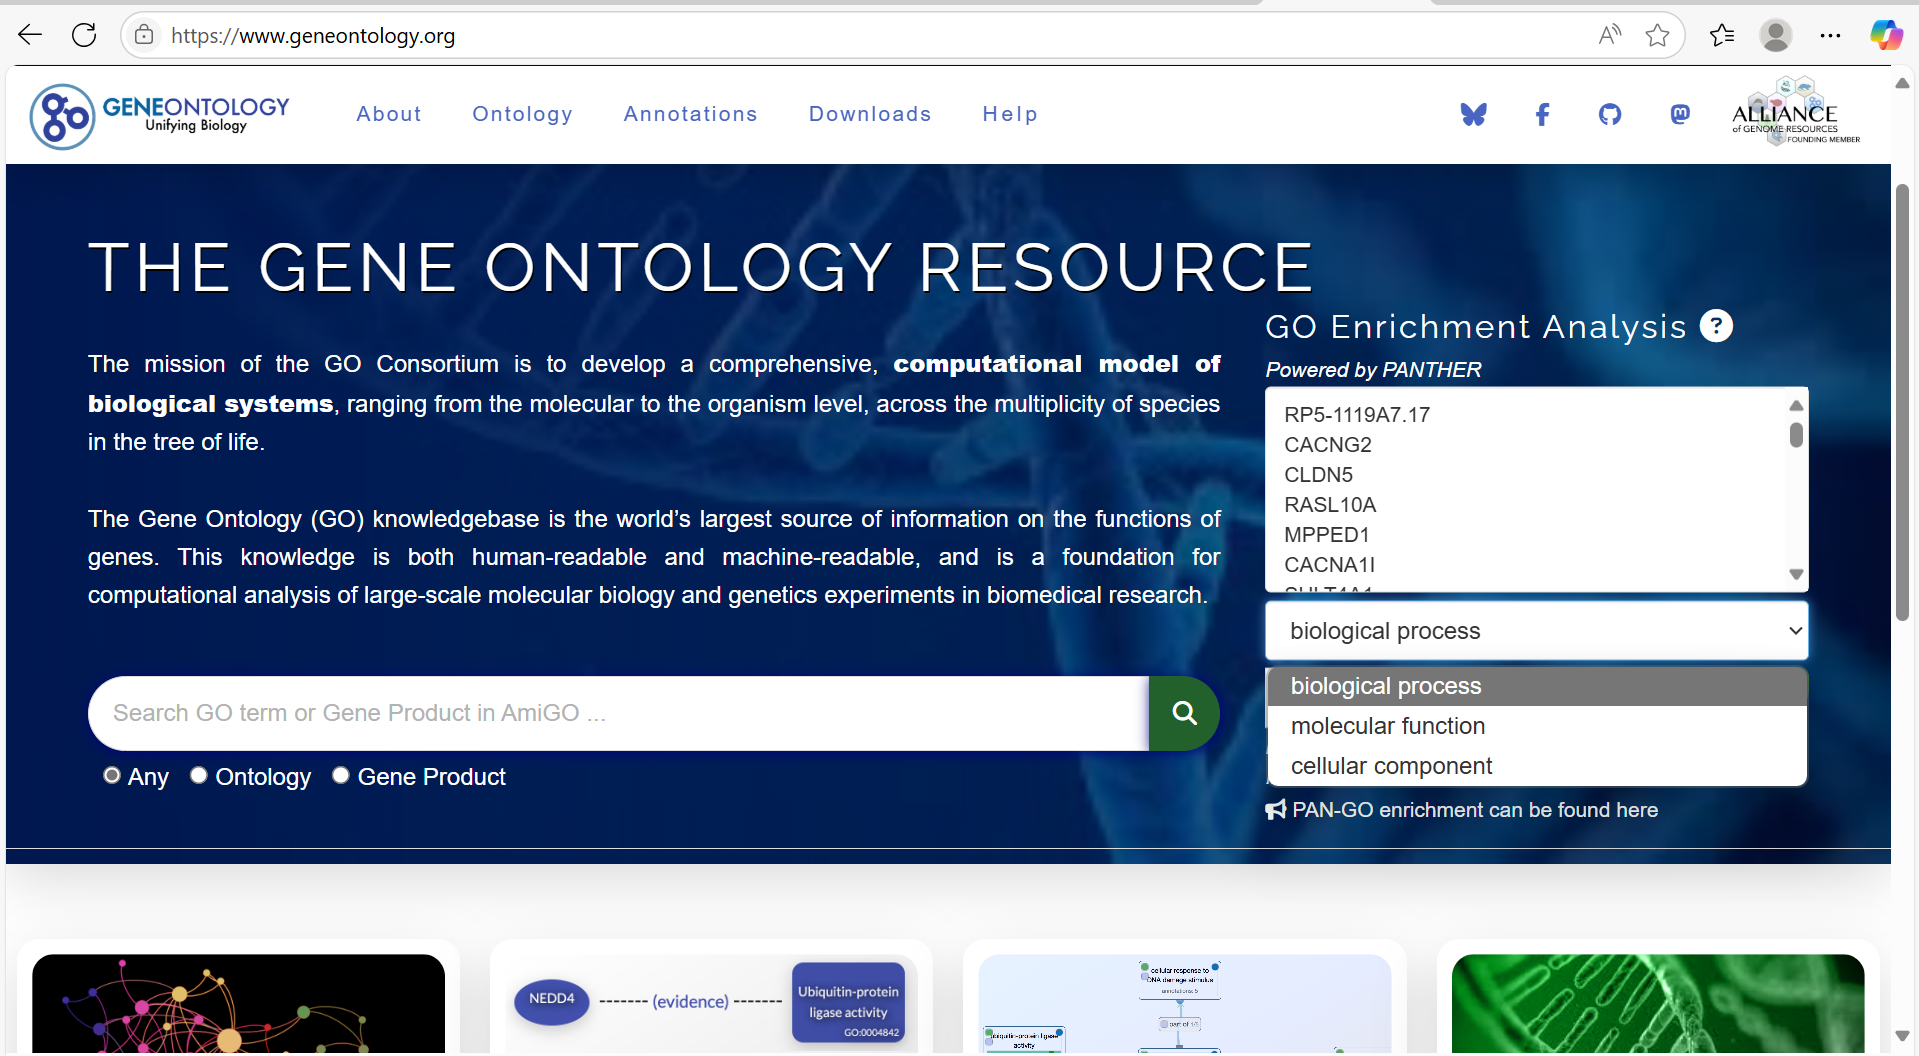

#### Biological Process: "Synaptic signaling" makes sense as these genes are highly expressed in HBR (human brain reference) sample
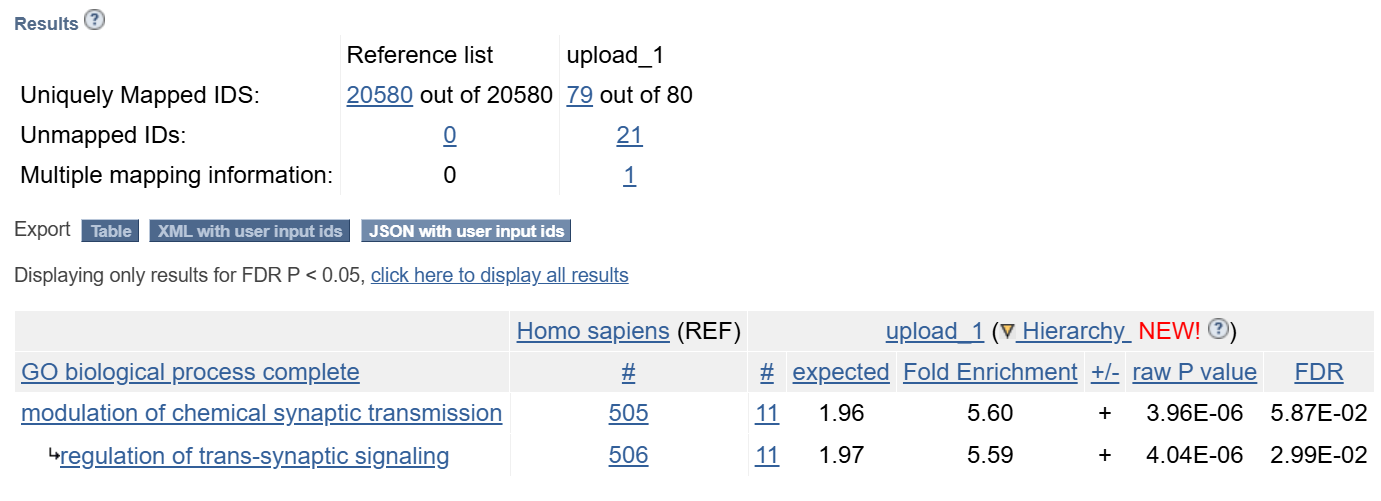

#### Cellular Component: "neuron" and"synapse" make sense
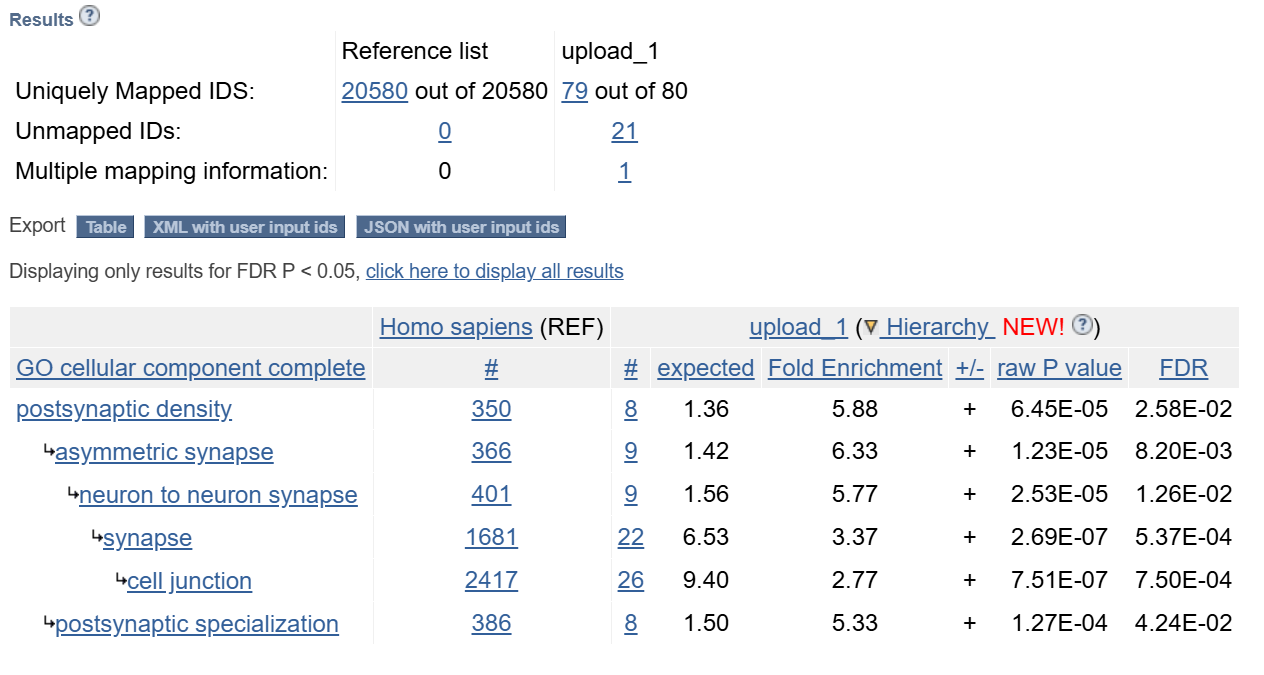

# Pathway Analysis of DE genes using R

In this section we will use the GAGE tool in R to test for significantly enriched sets of genes. What is gage?
The Generally Applicable Gene-set Enrichment tool ([GAGE](https://bioconductor.org/packages/release/bioc/html/gage.html)) is a popular bioconductor package used to perform gene-set enrichment and pathway analysis. The package works independent of sample sizes, experimental designs, assay platforms, and is applicable to both microarray and RNAseq data sets. In this section we will use GAGE and gene sets from the “Gene Ontology” ([GO](http://www.geneontology.org/)) and the [MSigDB](https://www.gsea-msigdb.org/gsea/msigdb) databases to perform pathway analysis.


In [ ]:
mkdir -p $RNA_HOME/de/deseq2/pathway
cd $RNA_HOME/de/deseq2

R

# Load in the DE results file with only significant genes (e.g., http://genomedata.org/cri-workshop/deseq2/DE_sig_genes_DESeq2.tsv)
DE_genes = read.table("DE_sig_genes_DESeq2.tsv", sep = "\t", header = TRUE, stringsAsFactors = FALSE)

output_dir = "/workspace/rnaseq/de/deseq2/pathway/"

#if (!dir.exists(output_dir)) {dir.create(output_dir, recursive = TRUE)}

setwd(output_dir)

# Install GO.db and gage, I didn't update any packages
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("GO.db")
BiocManager::install("gage")

# Load libraries
library(AnnotationDbi)
library(org.Hs.eg.db)
library(GO.db)
library(gage)

#### Setting up gene set databases
In order to perform our pathway analysis we need a list of pathways and their respective genes. There are many databases that contain collections of genes (or gene sets) that can be used to understand whether a set of mutated or differentially expressed genes are functionally related. Some of these resources include: GO, KEGG, MSigDB, and WikiPathways. For this exercise we are going to investigate GO and MSigDB. 

The GAGE package has a function for querying GO in real time: go.gsets(). This function takes a species as an argument and will return a list of gene sets and some helpful meta information for subsetting these lists. If you are unfamiliar with GO, it is helpful to know that GO terms are categorized into three gene ontologies: “Biological Process”, “Molecular Function”, and “Cellular Component”. This information will come in handy later in our exercise. 

GAGE does not provide a similar tool to investigate the gene sets available in MSigDB. Fortunately, MSigDB provides a download-able .gmt file for all gene sets. This format is easily read into GAGE using a function called readList(). If you check out MSigDB you will see that there are 8 unique gene set collections, each with slightly different features. For this exercise we will use the **C8 - cell type signature gene sets collection**, which is a collection of gene sets that contain cluster markers for cell types identified from single-cell sequencing studies of human tissue.

In [ ]:
# Set up go database
go.hs = go.gsets(species = "human")
go.bp.gs = go.hs$go.sets[go.hs$go.subs$BP]
go.mf.gs = go.hs$go.sets[go.hs$go.subs$MF]
go.cc.gs = go.hs$go.sets[go.hs$go.subs$CC]

# Here we will read in an MSigDB gene set that was selected for this exercise and saved to the course website. 
c8 = "http://genomedata.org/rnaseq-tutorial/c8.all.v7.2.entrez.gmt"
all_cell_types = readList(c8)

#### Annotating genes
OK, so we have our differentially expressed genes and we have our gene sets. However, if you look at one of the objects containing the gene sets you’ll notice that each gene set contains a series of integers. These integers are Entrez gene identifiers. 

But do we have comparable information in our DE gene list? Right now, no. Our previous results use Ensembl IDs as gene identifiers. We will need to convert our gene identifiers to the format used in the GO and MSigDB gene sets before we can perform the pathway analysis. Fortunately, Bioconductor maintains genome wide annotation data for many species, you can view these species with the [OrgDb biocViews](https://bioconductor.org/packages/release/BiocViews.html#___OrgDb). This makes converting the gene identifiers relatively straightforward, **below we use the [mapIds()](https://www.rdocumentation.org/packages/OrganismDbi/versions/1.14.1/topics/MultiDb-class) function to query the OrganismDb object for the Entrez id based on the Ensembl id.** 

Because there might not be a one-to-one relationship with these identifiers we also use multiVals="first" to specify that only the first identifier should be returned. Another option would be to use multiVals="asNA" to ignore one-to-many mappings.

In [ ]:
DE_genes$entrez = mapIds(org.Hs.eg.db, column = "ENTREZID", keys = DE_genes$ensemblID, keytype = "ENSEMBL", multiVals = "first")

### Some clean-up and identifier mapping
After completing the annotation above you will notice that **some of our Ensembl gene IDs were not mapped to an Entrez gene ID.** Why did this happen? Well, this is actually a complicated point and gets at some nuanced concepts of how to define and annotate a gene. The short answer is that **we are using two different resources that have annotated the human genome and there are some differences in how these resources have completed this task.** Therefore, it is expected that there are some discrepencies. 

In the next few steps we will clean up what we can by first removing the ERCC spike-in genes and then will use a different identifier for futher mapping.

In [ ]:
#Remove spike-in
DE_genes_clean = DE_genes[!grepl("ERCC", DE_genes$ensemblID), ]

##Just so we know what we have removed 
ERCC_gene_count = nrow(DE_genes[grepl("ERCC", DE_genes$ensemblID), ])
ERCC_gene_count #27 rows containing ERCC genes

###Deal with genes that we do not have an Entrez ID for 
# Creates a new data frame containing only the rows from DE_genes_clean that have missing Entrez IDs
missing_ensembl_key = DE_genes_clean[is.na(DE_genes_clean$entrez), ]
# DE_genes_clean is filtered to include only rows with valid Entrez mappings.
DE_genes_clean = DE_genes_clean[!DE_genes_clean$ensemblID %in% missing_ensembl_key$ensemblID, ] #"! %in%": Logical NOT IN

###Try mapping using a different key, aka, get entrez ID using gene symbol
missing_ensembl_key$entrez = mapIds(org.Hs.eg.db, column = "ENTREZID", keys = missing_ensembl_key$Symbol, keytype = "SYMBOL", multiVal = "first")

#Remove remaining genes 
missing_ensembl_key_update = missing_ensembl_key[!is.na(missing_ensembl_key$entrez),]

#Create a Final Gene list of all genes where we were able to find an Entrez ID (using two approaches)
DE_genes_clean = rbind(DE_genes_clean, missing_ensembl_key_update)
#In R, rbind() is a function used to combine data frames, matrices, or vectors by row-binding them. It stacks the rows of the provided objects on top of each other, creating a single object with all rows combined.

nrow(DE_genes) #297 (297 genes, substracting 27 ERCC genes, thus 270 genes)
nrow(DE_genes_clean) #260 (there're 10 genes that can't be mapped with ENTREZID)

### Final preparation of DESeq2 results for gage
OK, last step. Let’s format the differential expression results into **a format suitable for the GAGE package**. Basically **this means obtaining the log2 fold change values and assigning entrez gene identifiers to these values.**

In [ ]:
# grab the log fold changes for everything
De_gene.fc = DE_genes_clean$log2FoldChange

# set the name for each row to be the Entrez Gene ID
names(De_gene.fc) = DE_genes_clean$entrez

## GAGE
### Running pathway analysis
We can now use the gage() function to obtain the significantly perturbed pathways from our differential expression experiment.

Note on the abbreviations below: “bp” refers to biological process, “mf” refers to molecular function, and “cc” refers to cellular process. These are the three main categories of gene ontology terms/annotations that were mentioned above.

In [ ]:
#Run GAGE
#go 
fc.go.bp.p = gage(De_gene.fc, gsets = go.bp.gs)
fc.go.mf.p = gage(De_gene.fc, gsets = go.mf.gs)
fc.go.cc.p = gage(De_gene.fc, gsets = go.cc.gs)

#msigdb
fc.c8.p = gage(De_gene.fc, gsets = all_cell_types)

# Explore
class(fc.go.bp.p) #"list"
names(fc.go.bp.p) #"greater" "less"    "stats"
str(fc.go.bp.p, max.level = 1) #List of 3
colnames(fc.go.bp.p$greater) #"p.geomean" "stat.mean" "p.val"     "q.val"     "set.size"  "exp1"
colnames(fc.go.bp.p$stats) #"stat.mean" "exp1"
dim(fc.go.bp.p$greater) #15196     6
head(fc.go.bp.p$greater,3)

###Convert to dataframes 
#Results for testing for GO terms which are up-regulated
fc.go.bp.p.up = as.data.frame(fc.go.bp.p$greater)
fc.go.mf.p.up = as.data.frame(fc.go.mf.p$greater)
fc.go.cc.p.up = as.data.frame(fc.go.cc.p$greater)

#Results for testing for GO terms which are down-regulated
fc.go.bp.p.down = as.data.frame(fc.go.bp.p$less)
fc.go.mf.p.down = as.data.frame(fc.go.mf.p$less)
fc.go.cc.p.down = as.data.frame(fc.go.cc.p$less)

#Results for testing for MSigDB C8 gene sets which are up-regulated
fc.c8.p.up = as.data.frame(fc.c8.p$greater)

#Results for testing for MSigDB C8 gene sets which are down-regulated
fc.c8.p.down = as.data.frame(fc.c8.p$less)

#### ✅ fc.go.bp.p is a list of 3 numeric matrices, each with 15,196 rows and multiple columns:
| List Element | Meaning                                                           | Direction |
| ------------ | ----------------------------------------------------------------- | --------- |
| `greater`    | Enrichment statistics for **upregulated** gene sets (e.g. GO\:BP) | Up        |
| `less`       | Enrichment for **downregulated** gene sets                        | Down      |
| `stats`      | Background stats (e.g. average fold change or effect size)        | Neutral   |

| Column      | Description                                                                                       |
| ----------- | ------------------------------------------------------------------------------------------------- |
| `p.geomean` | Geometric mean p-value across permutations or samples                                             |
| `stat.mean` | Mean test statistic (e.g., log2 fold change)                                                      |
| `p.val`     | Raw p-value for the GO term                                                                       |
| `q.val`     | Adjusted p-value (FDR)                                                                            |
| `set.size`  | Number of genes in the GO term set                                                                |
| `exp1`      | Possibly redundant with `p.val` (often shows actual enrichment test p-value for condition "exp1") |


stat.mean = mean(log2FoldChange[genes in GO term X])

| `stat.mean` Value | Interpretation                                        |
| ----------------- | ----------------------------------------------------- |
| **> 0**           | On average, genes in this GO term are **upregulated** |
| **< 0**           | Genes in this GO term are **downregulated**           |
| **≈ 0**           | No consistent change in expression                    |


### Explore significant results
Alright, now we have results with accompanying p-values (yay!).

What does “up-“ or “down-regulated” mean here, in the context of our UHR vs HBR comparison? It may help to open and review the data in your DE_genes_DESeq2.tsv file.

When DESeq2 outputs something like: "log2 fold change: Condition UHR vs HBR"
🔍 Interpretation:
- A positive log2FC → gene is upregulated in UHR (relative to HBR).
- A negative log2FC → gene is downregulated in UHR (i.e., upregulated in HBR).

In [ ]:
#Try doing something like this to find some significant results:
#View the top 20 significantly up- or down-regulated GO terms from the Cellular Component Ontology
head(fc.go.cc.p.up[order(fc.go.cc.p.up$p.val),], n = 20) #highly expressed in UHR
head(fc.go.cc.p.down[order(fc.go.cc.p.down$p.val),], n = 20) #highly expressed in HBR

#You can do the same thing with your results from MSigDB
head(fc.c8.p.up)
head(fc.c8.p.down)
head(fc.c8.p.down[order(fc.c8.p.down$p.val),])

#What if we want to know which specific genes from our DE gene result were found in a specific significant pathway?
#For example, one significant pathway from fc.go.cc.p.down was "GO:0045202 synapse" with set.size = 33 genes.
#Let's extract the postsynapse DE gene results
synapse = DE_genes_clean[which(DE_genes_clean$entrez %in% go.cc.gs$`GO:0045202 synapse`),]
head(synapse)
nrow(synapse) #33

#How many total synapse genes are there in GO? How many total DE genes (260)? How many overlap (33)?
length(go.cc.gs$`GO:0045202 synapse`) #1660
length(DE_genes_clean$entrez) #same as nrow(DE_genes_clean): 260
length(synapse$entrez) # same as nrow(synapse): 33

#Are the synapse DE genes consistently down-regulated? Let's print out a subset of columns from the DE result for synapse genes
synapse[,c("Symbol", "entrez", "log2FoldChange", "padj", "UHR_Rep1", "UHR_Rep2", "UHR_Rep3", "HBR_Rep1", "HBR_Rep2", "HBR_Rep3")]

### More exploration outside of R
At this point, it will be helpful to move out of R and further explore our results locally. We will use an online tool to visualize how the GO terms we uncovered are related to each other.

In [ ]:
# extract the GO ID from the row names and add it as a new column "GO_id" to the fc.go.cc.p.up data frame
fc.go.cc.p.up$GO_id <- sub("^(GO:\\d+).*", "\\1", rownames(fc.go.cc.p.up))
fc.go.cc.p.down$GO_id <- sub("^(GO:\\d+).*", "\\1", rownames(fc.go.cc.p.down))

# Guess what these commands do?
fc.go.cc.p.up$GO_term <- sub("^GO:\\d+\\s+", "", rownames(fc.go.cc.p.up))
fc.go.cc.p.down$GO_term <- sub("^GO:\\d+\\s+", "", rownames(fc.go.cc.p.down))


write.table(fc.go.cc.p.up, "fc.go.cc.p.up.tsv", quote = FALSE, sep = "\t", col.names = TRUE, row.names = FALSE)
write.table(fc.go.cc.p.down, "fc.go.cc.p.down.tsv", quote = FALSE, sep = "\t", col.names = TRUE, row.names = FALSE)

### Visualize
For this next step we will do a very brief introduction to visualizing our results. We will use a tool called [GOView](https://2019.webgestalt.org/2017/GOView/), which is part of the WEB-based Gene Set Ananlysis ToolKit ([WebGestalt](http://www.webgestalt.org/)) suite of tools.

1. In GOView, enter desired name such as "UpHigherInUHR" and "DownHigherInHBR" then "add field" 
2. Download the linked files by right clicking on the two saved result files: fc.go.cc.p.up.tsv and fc.go.cc.p.down.tsv.
3. Open this on Excel as "Delimited", check the box "My data has header", select and "Tab", set GO_id and GO_term columns as "Text", the rest as "General".
4. For fc.go.cc.p.down.tsv, sort data by stat.mean column (A>Z, small to large) and
5. cut and paste top 20 GO ids of interest directly into GOView.

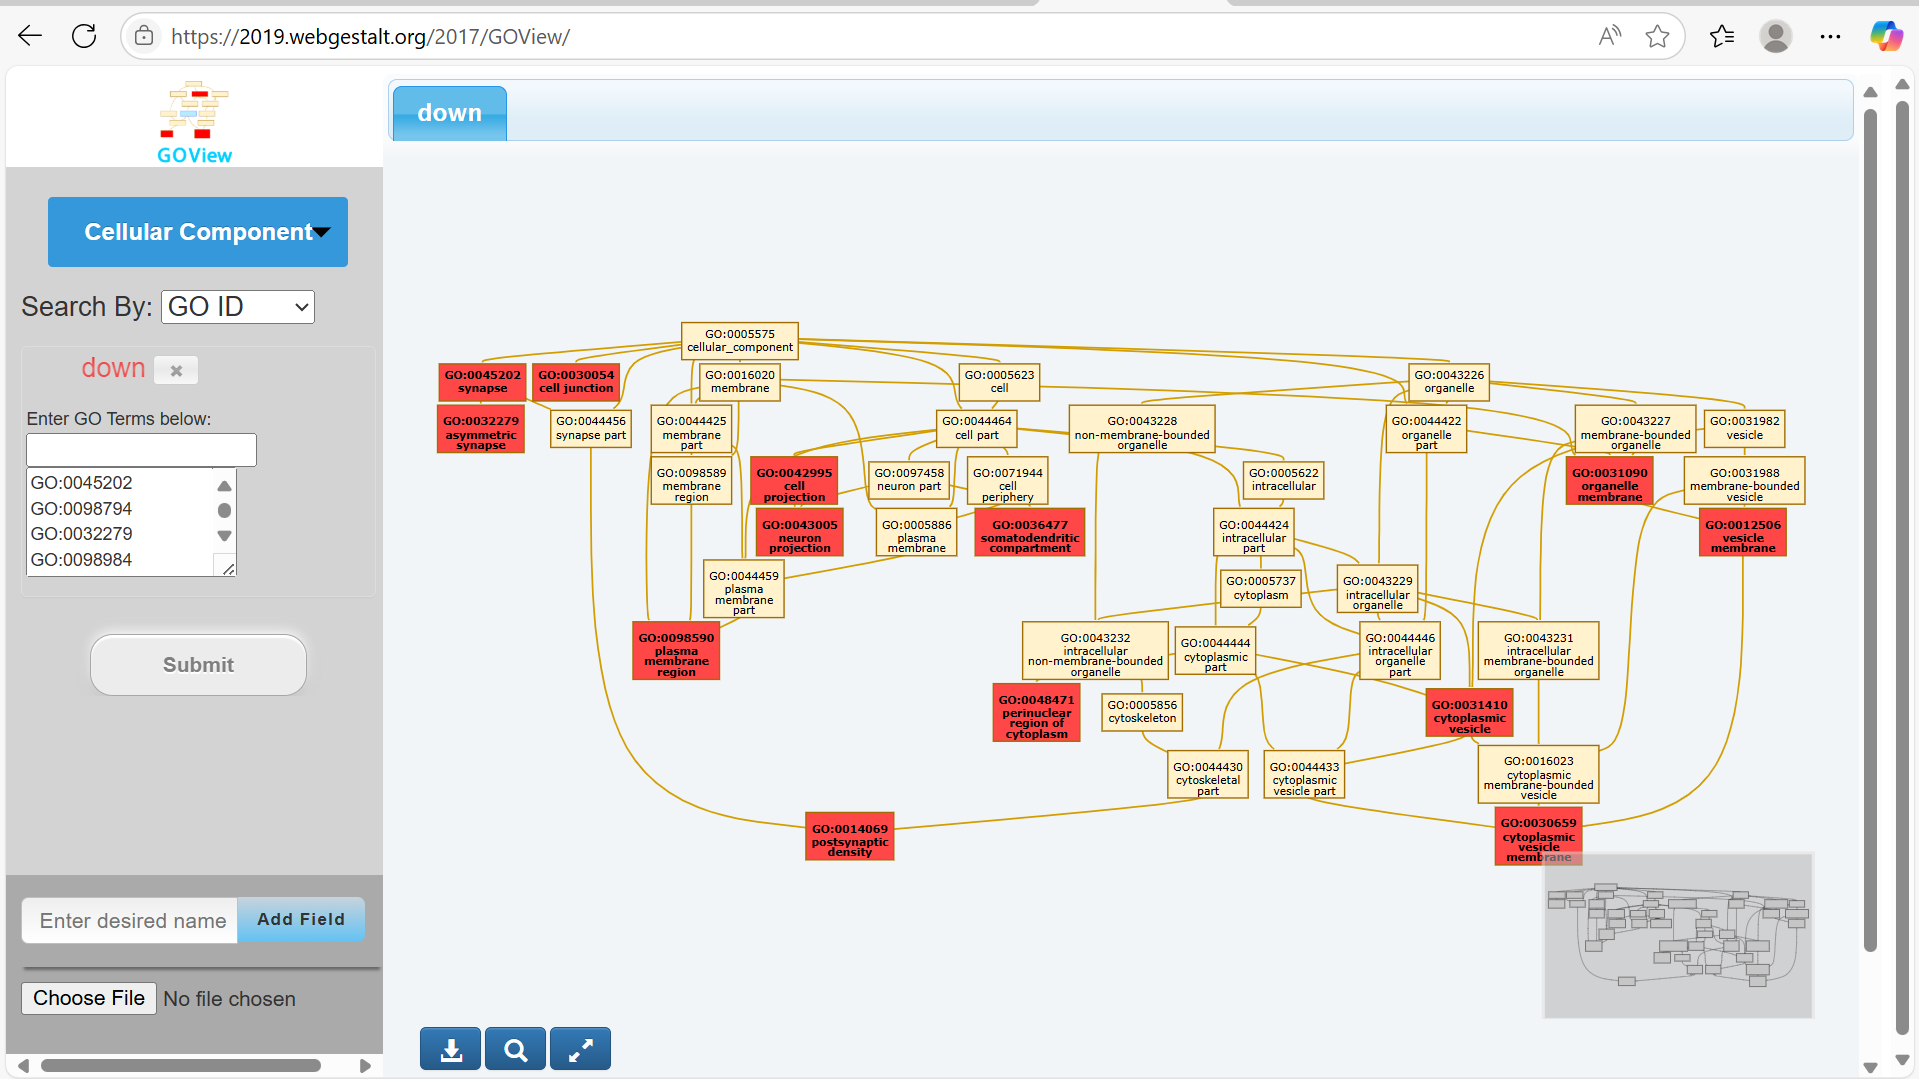

# Alternative Pathway analysis tools and strategies!
At this point, to generate additional visualizations and gain more insight from our enrichment analysis, we can turn to two powerful functions in the clusterProfiler package: gseGO and enrichKEGG. These tools allow us to go beyond simply identifying enriched pathways and give us the ability to visualize and explore these pathways in a much more detailed way.

First, to use gseGO and enrichKEGG effectively, we need a ranked list of DE genes based on their log2 fold change values. This ranked list allows us to analyze and visualize enrichment based on the degree of differential expression, rather than just a binary presence or absence in a pathway.

## GSEA

In [ ]:
# Create a named vector of log2 fold changes with Entrez IDs as names
ranked_genes <- setNames(DE_genes_clean$log2FoldChange, DE_genes_clean$entrez)

# Sort the genes by log2 fold change
ranked_genes <- sort(ranked_genes, decreasing = TRUE)
head(ranked_genes)
length(ranked_genes) #260

# Remove duplicated gene IDs, required for gseGO()
ranked_genes <- ranked_genes[!duplicated(names(ranked_genes))]
length(ranked_genes) #258

# Remove any NA values
ranked_genes <- ranked_genes[!is.na(ranked_genes)]
length(ranked_genes) #258

# Install a package missing from the template
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = TRUE)
BiocManager::install("enrichplot", update = FALSE, ask = FALSE, quiet = TRUE)
BiocManager::install("clusterProfiler", update = FALSE, ask = FALSE, quiet = TRUE)
BiocManager::install("pathview", update = FALSE, ask = FALSE, quiet = TRUE)

# Load relevant packages
library(enrichplot)
library(clusterProfiler)
library(pathview)
library(ggnewscale)
library(ggplot2)

gsea_res <- gseGO(
  geneList = ranked_genes,       # Ranked list of genes
  OrgDb = org.Hs.eg.db,          # Specify organism database
  ont = "CC",                    # Use "BP" for Biological Process, "MF" for Molecular Function, "CC" for Cellular Component
  keyType = "ENTREZID",          # Ensure your gene IDs match the key type in OrgDb
  pvalueCutoff = 0.05,           # Set a p-value cutoff for significant pathways
  verbose = TRUE
)

#summary(gsea_res)
head(gsea_res@result, 5)


This shows the actual enrichment result table, where you’ll see columns like:
- ID: GO term ID
- Description: GO term name
- enrichmentScore, NES (normalized enrichment scores): indicating upregulated/downregulated gene sets
- pvalue, p.adjust, qvalue
- core_enrichment: core genes contributing to the enrichment

In [ ]:
# Plot the enrichment plot for a specific GO term or pathway - Synapse
gsea_plot <- gseaplot2(gsea_res, geneSetID = "GO:0045202", title = "Enrichment Plot for Synapse")
ggsave("gsea_go_synapse_plot.pdf", plot=gsea_plot, width = 8, height = 8)

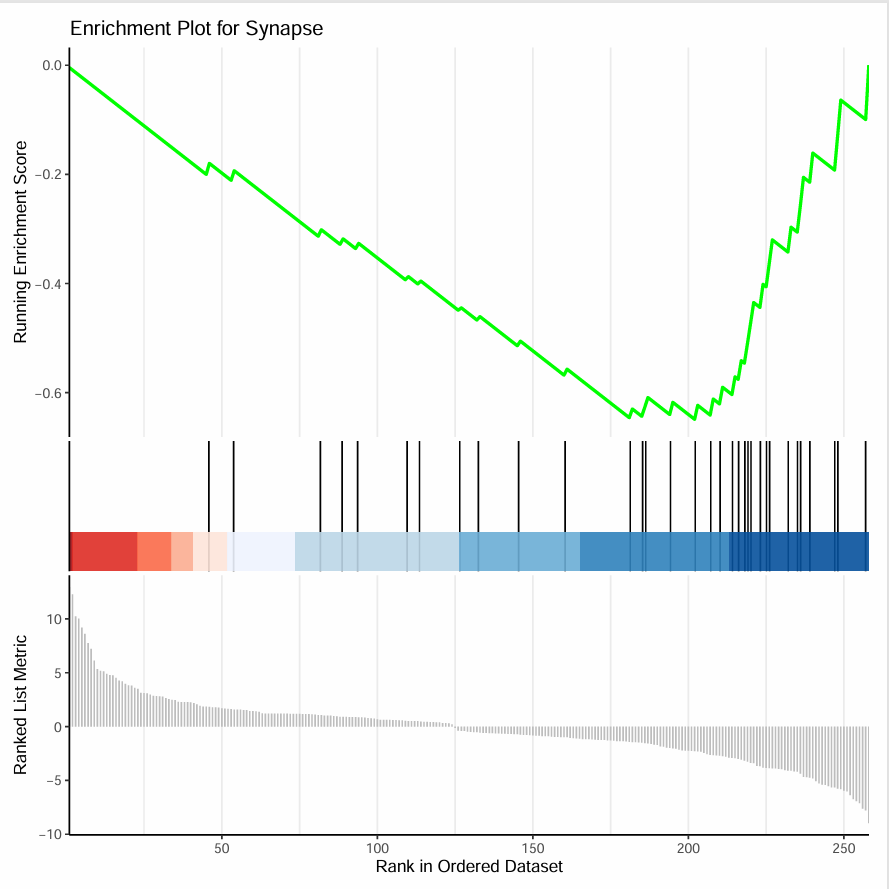

### Interpreting the plot:
#### 🔹 Top Panel — Running Enrichment Score (green curve)
- The green line represents the running enrichment score (ES) as GSEA walks down your ranked gene list.
- Minimum point of the green curve ≈ actual ES value.
- In this plot, the curve reaches its lowest point around rank ~170–180, meaning the genes from the "synapse" gene set are mostly located toward the bottom of the ranked list.

✅ Interpretation: The "Synapse" GO term is negatively enriched, meaning that the genes in this set tend to have lower expression (or more negative log2 fold changes) in your experiment — downregulated in UHR. This makes sense because Synapse is more expressed in HBR.

#### 🔹 Middle Panel — Black Vertical Lines (Gene Hits)
- Each black tick marks the position of a gene in the synapse gene set along the ranked gene list.
- The clustering of black lines toward the right side confirms that most synapse-related genes are enriched at the bottom (downregulated side) of your ranking.

#### 🔹 Colored Bar — Heatmap of Ranking Metric
- Red to blue color bar shows the gradient of your ranking metric (e.g., log2FC, Wald statistic).
- Red = genes at the top of the ranked list (upregulated)
- Blue = genes at the bottom (downregulated)
- Again, your gene set is mostly aligned with the blue region, reinforcing negative enrichment.

#### 🔹 Bottom Panel — Ranked List Metric
- This is a barplot of your ranking metric for all genes.
- Shows that most values are positive on the left (upregulated genes), while negative values on the right (downregulated genes).
- So, again, this supports that synapse-related genes are mostly downregulated in your dataset.

#### We can use additional visualizations, such as dot plots, ridge plots, and concept network plots, to gain further insights into the enriched pathways.

In [ ]:
# Dotplot for top GO pathways enriched with DE genes
gsea_dot_plot <- dotplot(gsea_res, showCategory = 30) + ggtitle("GSEA Dotplot - Top GO Terms")
ggsave("gsea_dot_plot.pdf", plot=gsea_dot_plot, width = 8, height = 8)
# sum(gsea_res@result$p.adjust < 0.05) #13

#Ridgeplot for top GO pathways enriched with DE genes
gsea_ridge_plot <-ridgeplot(gsea_res) + ggtitle("GSEA ridge plot  - Top GO Terms")
ggsave("gsea_ridge_plot.pdf", plot=gsea_ridge_plot, width = 8, height = 8)

#ChatGPT's version:
gsea_ridge_plot <- ridgeplot(gsea_res) +
  ggtitle("GSEA ridge plot – Top GO Terms") +
  annotate("text", x = -10, y = 0.8, label = "Enriched in HBR", hjust = 0, size = 4) +
  annotate("text", x = 5, y = 0.8, label = "Enriched in UHR", hjust = 0, size = 4) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "black")
ggsave("gsea_ridge_plot_annotated.pdf", plot = gsea_ridge_plot, width = 8, height = 8)

# Concept network plot to illustrate relationships between the top enriched GO terms and DE genes
gsea_cnetplot <- cnetplot(gsea_res, foldChange = ranked_genes, showCategory = 10) + ggtitle("GSEA concept network plot  - Top GO Terms")
ggsave("gsea_cnetplot.pdf", plot=gsea_cnetplot, width = 8, height = 6)

#### Dot plot

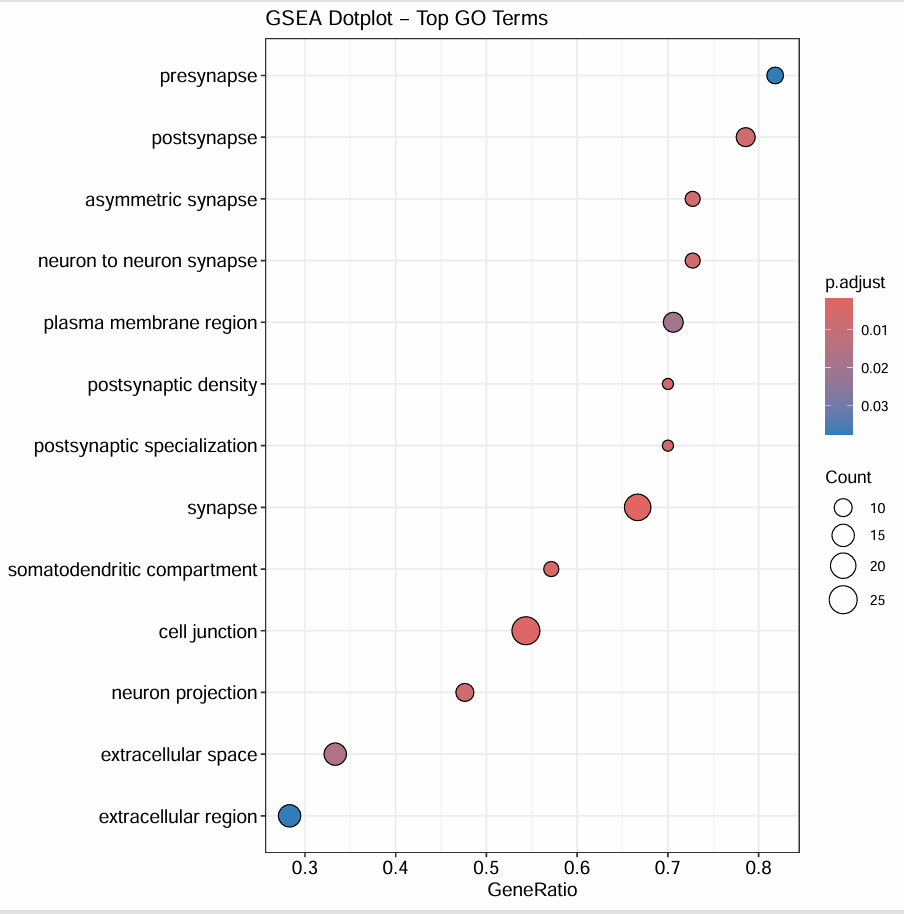

We specified showCategory = 30 but only 13 dots appear, the reason is simple: Only 13 gene sets passed your significance threshold.
- The function dotplot() displays up to showCategory gene sets, but only those that meet filtering criteria in your gsea_res object — particularly:
    - p.adjust < pvalueCutoff (you set pvalueCutoff = 0.05 in gseGO())
    - Possibly also qvalue < 0.2 if qvalueCutoff was active
    - Gene sets must have valid enrichment results (non-empty, non-NA, etc.)

| Feature       | Encoded By                         | Interpretation                                           |
| ------------- | ---------------------------------- | -------------------------------------------------------- |
| **Y-axis**    | GO term descriptions               | The names of the top enriched GO terms                   |
| **X-axis**    | `GeneRatio`                        | Proportion of core genes in the gene set (core/total)    |
| **Dot size**  | `Count` (core enrichment size)     | Number of genes from your ranked list contributing to ES |
| **Dot color** | `p.adjust` (FDR-corrected p-value) | Significance — **red = more significant**, blue = less   |


#### ridge plot

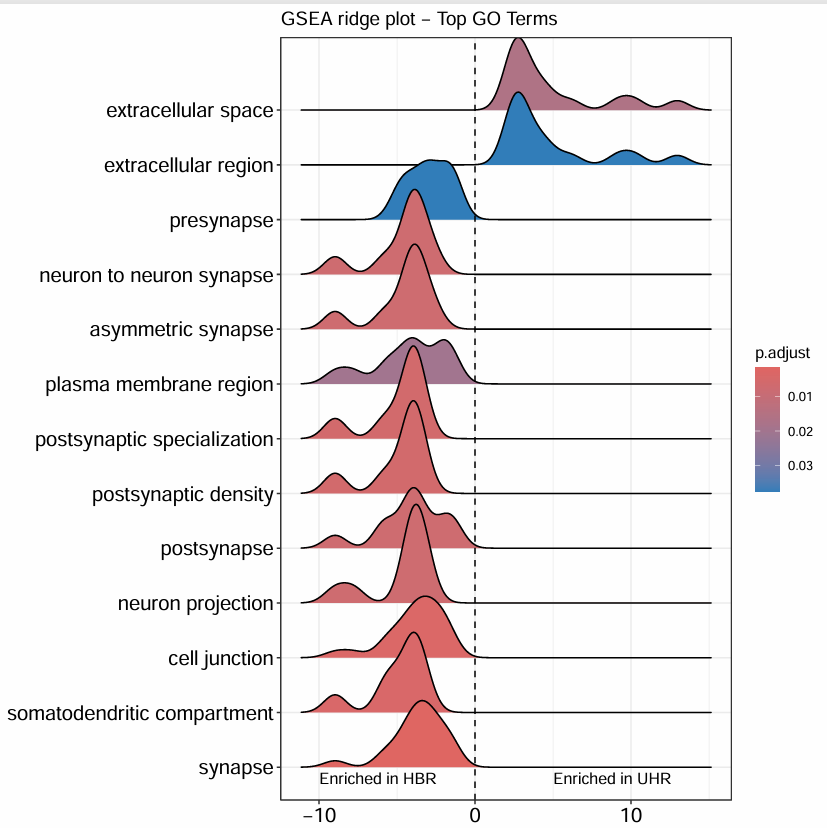

#### Concept network plot

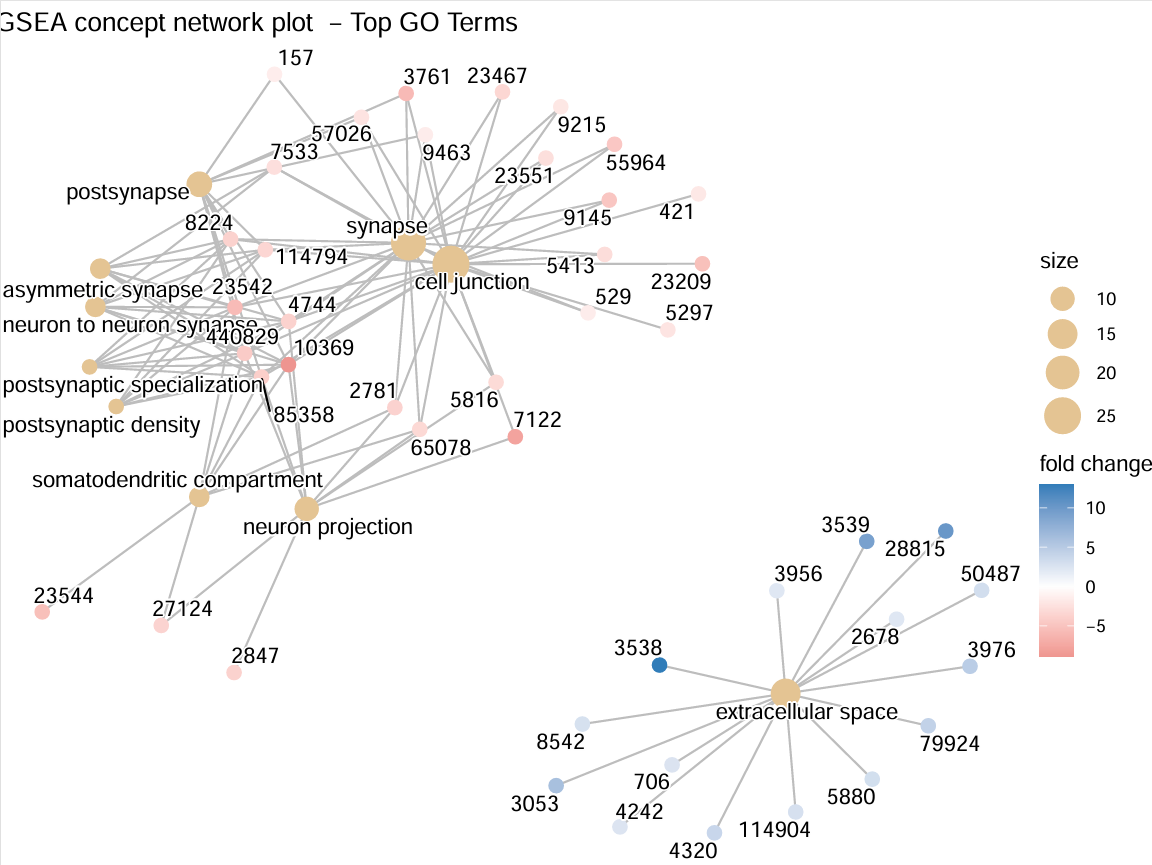

⚠️ Common Issues with cnetplot:
| Issue                              | Description                                                                  |
| ---------------------------------- | ---------------------------------------------------------------------------- |
| **Overcrowded nodes**              | Genes shared across multiple terms create a tangled web of edges.            |
| **Hard to compare terms**          | No clear axes for NES, p-value, or gene ratios.                              |
| **Fold change coloring is subtle** | Hard to distinguish nuanced differences without a legend with exact cutoffs. |
| **Unclear grouping**               | If GO terms cluster tightly, it’s hard to see functional themes.             |

✅ When cnetplot is most useful:
- Small number of non-redundant gene sets (e.g., 3–6 GO terms)
- To show which genes are shared across related pathways
- For presentation graphics to highlight key connections

## KEGG

**KEGG (Kyoto Encyclopedia of Genes and Genomes) Pathway** is a collection of manually curated pathway maps that represent knowledge on the molecular interaction and reaction networks for:
- Metabolism (e.g., glycolysis, TCA cycle)
- Genetic information processing (e.g., transcription, translation)
- Environmental information processing (e.g., signal transduction)
- Cellular processes (e.g., cell cycle, apoptosis)
- Organismal systems (e.g., immune system, endocrine system)
- Human diseases (e.g., cancer, diabetes pathways)
- Drug development (e.g., pharmacokinetics and mechanisms)

Each KEGG pathway map links genes (or gene products like proteins) to their functional roles in these biological processes. 

Example: The KEGG "p53 signaling pathway" shows how the TP53 gene product (p53 protein) regulates downstream genes involved in:
- Cell cycle arrest
- DNA repair
- Apoptosis

This helps in understanding the functional context of a gene or gene set — especially in omics data analysis like RNA-seq.


The enrichKEGG function can be used to visualize KEGG pathways, showing detailed diagrams with our DE genes highlighted. This approach is especially useful for understanding the biological roles of up- and down-regulated genes within specific metabolic or signaling pathways. 

By using the pathview package, we can generate pathway diagrams where each DE gene is displayed in its functional context and color-coded by expression level. This makes it easy to see which parts of a pathway are impacted and highlights any potential regulatory or metabolic shifts in a clear, intuitive format. 

We will start by downloading and installing the KEGG database and then run the enrichKEGG function.

In [ ]:
# Download KEGG DB file and install
download.file('https://www.bioconductor.org/packages/3.11/data/annotation/src/contrib/KEGG.db_3.2.4.tar.gz', destfile='KEGG.db_3.2.4.tar.gz')
install.packages("KEGG.db_3.2.4.tar.gz", repos = NULL, type = "source")

# Run enrichKEGG with local database option
pathways <- enrichKEGG(gene = names(ranked_genes), organism = "hsa", keyType = "kegg", use_internal_data=TRUE)
head(pathways@result)

In [ ]:
# Let’s choose one of the pathways above, for example hsa04010 - MAPK signaling pathway to visualize.
# Define the KEGG pathway ID based on above, and run pathview (note this automatically generates and saves plots to your current directory)
pathway_id <- "hsa04010"
pathview(
  gene.data = ranked_genes,    
  pathway.id = pathway_id,  
  species = "hsa",          # Species code for human
  limit = list(gene = c(-2, 2)),  # Set color scale limits for log2 fold changes
  low = "blue",             # Color for down-regulated genes
  mid = "white",            # Color for neutral genes
  high = "red"              # Color for up-regulated genes
)

pathway_id <- "hsa04727" #GABAergic synapse 
pathview(
  gene.data = ranked_genes,    
  pathway.id = pathway_id,  
  species = "hsa",         
  limit = list(gene = c(-2, 2)),  
  low = "blue",        
  mid = "white",       
  high = "red" 
)

#### Here are the top genes highly expressed in HBR:
RP5-1119A7.17 CACNG2 CLDN5 RASL10A MPPED1 CACNA1I SULT4A1 RFPL1S DGCR5 CHADL LINC00634 KCNJ4 **MAPK8IP2** CSDC2 SGSM1 TUBA8 SEZ6L SLC25A18 MLC1 DGCR5 SLC7A4 SYNGR1 DGCR9 EFCAB6 SEPT3 SHISA8 CBX7

#### 🔁 2. MAPK Signaling Pathway – hsa04010
**MAPK8IP2 (JIP2 or IB2)** is a brain-enriched scaffold protein for **JNK and p38 signaling** in neurons. KEGG and GSEA analyses show it is part of the MAPK signaling pathway

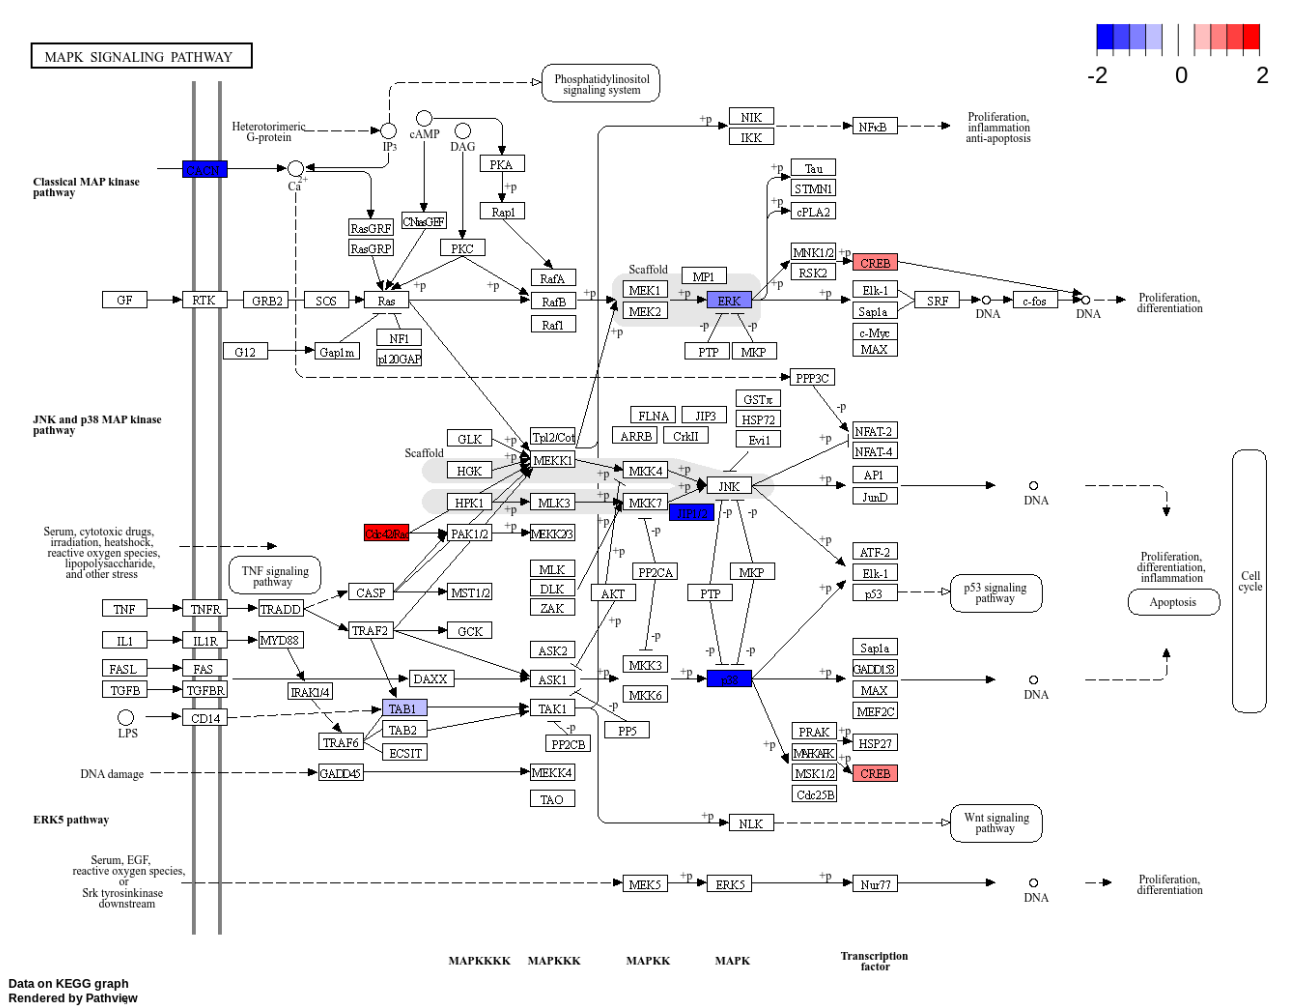

#### [Bonus] 🔎 Use KEGG Web Search to find more KEGG pathway IDs related to synapse or brain function:
Note that our DE genes might not be in all of these synapse pathways.
1. Go to the KEGG pathway browser: https://www.kegg.jp/kegg/pathway.html
2. 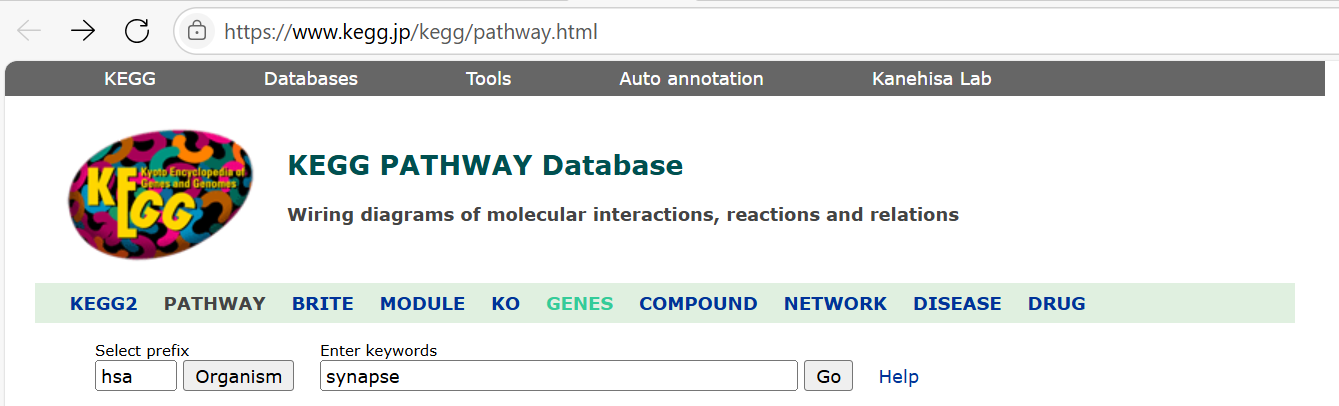

| KEGG Pathway                            | Description                     | KEGG ID    |
| --------------------------------------- | ------------------------------- | ---------- |
| Glutamatergic synapse                   | Neurotransmission (glutamate)   | `hsa04724` |
| GABAergic synapse                       | Inhibitory neurotransmission    | `hsa04727` |
| Cholinergic synapse                     | Acetylcholine signaling         | `hsa04725` |
| Dopaminergic synapse                    | Dopamine signaling              | `hsa04728` |
| Serotonergic synapse                    | Serotonin pathway               | `hsa04726` |
| Synaptic vesicle cycle                  | Vesicle trafficking in synapses | `hsa04721` |
| Long-term potentiation (LTP)            | Synaptic plasticity             | `hsa04720` |
| Neuroactive ligand-receptor interaction | Receptor signaling in the brain | `hsa04080` |
| Alzheimer's disease                     | Pathology involving synapses    | `hsa05010` |
